In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dna_data = pd.read_csv('Splice_Data.csv')
dna_data

,Point_of_Connectivity,Gene_ID,DNA_Sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...
...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTT...
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAA...
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCG...
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTG...


In [3]:
dna_data['DNA_Sequence'] = dna_data['DNA_Sequence'].str.replace(' ', '')

In [4]:
dna_data

,Point_of_Connectivity,Gene_ID,DNA_Sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...
...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...


In [5]:
def Kmer_Sequences(dna_seq,size=6):
    all_combinations=[]
    for x in range(len(dna_seq)-size +1):
        all_combinations.append(dna_seq[x:x+size].lower())
    return all_combinations

In [6]:
dna_data['subsequences'] = dna_data.apply(lambda x:Kmer_Sequences(x['DNA_Sequence']),axis=1).values

In [7]:
dna_data['subsequences']

0       [ccagct, cagctg, agctgc, gctgca, ctgcat, tgcat...
1       [agaccc, gacccg, acccgc, cccgcc, ccgccg, cgccg...
2       [gaggtg, aggtga, ggtgaa, gtgaag, tgaagg, gaagg...
3       [gggctg, ggctgc, gctgcg, ctgcgt, tgcgtt, gcgtt...
4       [gctcag, ctcagc, tcagcc, cagccc, agcccc, gcccc...
                              ...                        
3185    [tctctt, ctcttc, tcttcc, cttccc, ttccct, tccct...
3186    [gagctc, agctcc, gctccc, ctccca, tcccag, cccag...
3187    [tctcgg, ctcggg, tcgggg, cggggg, gggggc, ggggc...
3188    [attcta, ttctac, tctact, ctactt, tactta, actta...
3189    [aggctg, ggctgc, gctgcc, ctgcct, tgccta, gccta...
Name: subsequences, Length: 3190, dtype: object

In [8]:
dna_data

,Point_of_Connectivity,Gene_ID,DNA_Sequence,subsequences
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCC...,"[ccagct, cagctg, agctgc, gctgca, ctgcat, tgcat..."
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCC...,"[agaccc, gacccg, acccgc, cccgcc, ccgccg, cgccg..."
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCG...,"[gaggtg, aggtga, ggtgaa, gtgaag, tgaagg, gaagg..."
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTT...,"[gggctg, ggctgc, gctgcg, ctgcgt, tgcgtt, gcgtt..."
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCC...,"[gctcag, ctcagc, tcagcc, cagccc, agcccc, gcccc..."
...,...,...,...,...
3185,N,ORAHBPSBD-NEG-2881,TCTCTTCCCTTCCCCTCTCTCTTTCTTTCTTTTCTCTCCTCTTCTC...,"[tctctt, ctcttc, tcttcc, cttccc, ttccct, tccct..."
3186,N,ORAINVOL-NEG-2161,GAGCTCCCAGAGCAGCAAGAGGGCCAGCTGAAGCACCTGGAGAAGC...,"[gagctc, agctcc, gctccc, ctccca, tcccag, cccag..."
3187,N,ORARGIT-NEG-241,TCTCGGGGGCGGCCGGCGCGGCGGGGAGCGGTCCCCGGCCGCGGCC...,"[tctcgg, ctcggg, tcgggg, cggggg, gggggc, ggggc..."
3188,N,TARHBB-NEG-541,ATTCTACTTAGTAAACATAATTTCTTGTGCTAGATAACCAAATTAA...,"[attcta, ttctac, tctact, ctactt, tactta, actta..."


In [9]:
dna_data2 = list(dna_data['subsequences'])

In [10]:
for item in range(len(dna_data2)):
    dna_data2[item] = ' '.join(dna_data2[item])

In [11]:
print(dna_data2[2])

gaggtg aggtga ggtgaa gtgaag tgaagg gaagga aaggac aggacg ggacgt gacgtc acgtcc cgtcct gtcctt tccttc ccttcc cttccc ttcccc tcccca ccccag cccagg ccagga caggag aggagc ggagcc gagccg agccgg gccggt ccggtg cggtga ggtgag gtgaga tgagaa gagaag agaagc gaagcg aagcgc agcgca gcgcag cgcagt gcagtc cagtcg agtcgg gtcggg tcgggg cggggg gggggc ggggca gggcac ggcacg gcacgg cacggg acgggg cgggga ggggat gggatg


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(ngram_range=(2,2))
X = cnt_vec.fit_transform(dna_data2)
Y = dna_data['Point_of_Connectivity']

<AxesSubplot:>

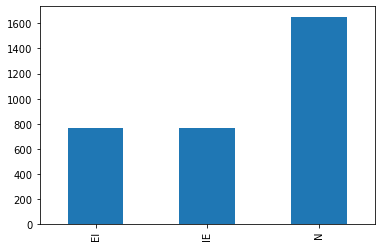

In [13]:
dna_data['Point_of_Connectivity'].value_counts().sort_index().plot.bar()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(2552, 15833)
(638, 15833)


In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=0.5)

In [17]:
Y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [19]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(Y_test, name='Actual'), pd.Series(Y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(Y_test, Y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  EI  IE   N
Actual               
EI         43  38  78
accuracy = 0.704 
precision = 0.704 
recall = 0.704 
f1 = 0.703


In [21]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)